In [1]:
import pandas as pd
import pylab as plt
import pickle
import numpy as np
import seaborn as sns
sns.set(font_scale=1.4)
sns.set_style("white")

%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a * np.exp(b * x) + c

In [3]:
#Read adata
df_ineq = pd.read_csv("./wid/Data/WID_US_InequalityData.csv",sep=";",skiprows=7)
df_macr = pd.read_csv("./wid/Data/WID_US_MacroData.csv",sep=";",skiprows=7)

Things we need:
- Labor income: pllin: pre-tax labor income [pre-tax labor income ranking] --> apllin992j
- Wealth: hweal                         net personal wealth --> ahweal992j
- Capital gains: Fraction of the return on wealth that "becomes income" --> afikgi992t
- Rate of return:
    - Dividends: fidiv  (afidiv992t) ,sfidiv999t                      dividends
    - Interests: ptint  (sfkfix992j)                     interest income
    - Housing: pthou    (sfkhou992j)                     housing asset income
    - Equity: ptfin     (sptfin992j)                    equity asset income
    - Pensions: fkpen    (sfkpen992j                     pensions and life insurance asset income
    - Capital: fkmik  (sfkmik992j)                       capital component of mixed income
- Saving rates: hsavi  (ahsavi992i)                       net personal saving

df_macr["ahsavi992i"]
df_ineq[["year","perc","apllin992j","ahweal992j","afikgi992t",
         "sfidiv999t","sfkfix992j","sfkhou992j","sptfin992j","sfkpen992j","sfkmik992j"]].groupby("perc").describe()

- Labor/wealth --> WID
- Capital gains/rate of return/saving rates --> "Yonatan"

In [26]:
!grep dicot wid/Data/WID_US_InequalityData.csv

In [25]:
#!grep dicot wid/Data/WID_US_InequalityData.csv
!grep "tax" wid/Data/wid_codes.txt

## Initialization data (1962)

In [6]:
perc = ["p{}p{}".format(i,i+1) for i in range(100)]
print(perc)
init_wealth = df_ineq.loc[(df_ineq["year"]==1966)&(df_ineq["perc"].isin(perc)),["year","perc","ahweal992j"]]    
init_wealth["perc"] = init_wealth["perc"].apply(lambda x: x.split("p")[1]).astype(int)
init_wealth = init_wealth.sort_values(by="perc")
np.savetxt("data_abm/init_wealth_percentile.txt",init_wealth["ahweal992j"])

#TOREAD np.loadtxt("data_abm/init_wealth_percentile.txt")

['p0p1', 'p1p2', 'p2p3', 'p3p4', 'p4p5', 'p5p6', 'p6p7', 'p7p8', 'p8p9', 'p9p10', 'p10p11', 'p11p12', 'p12p13', 'p13p14', 'p14p15', 'p15p16', 'p16p17', 'p17p18', 'p18p19', 'p19p20', 'p20p21', 'p21p22', 'p22p23', 'p23p24', 'p24p25', 'p25p26', 'p26p27', 'p27p28', 'p28p29', 'p29p30', 'p30p31', 'p31p32', 'p32p33', 'p33p34', 'p34p35', 'p35p36', 'p36p37', 'p37p38', 'p38p39', 'p39p40', 'p40p41', 'p41p42', 'p42p43', 'p43p44', 'p44p45', 'p45p46', 'p46p47', 'p47p48', 'p48p49', 'p49p50', 'p50p51', 'p51p52', 'p52p53', 'p53p54', 'p54p55', 'p55p56', 'p56p57', 'p57p58', 'p58p59', 'p59p60', 'p60p61', 'p61p62', 'p62p63', 'p63p64', 'p64p65', 'p65p66', 'p66p67', 'p67p68', 'p68p69', 'p69p70', 'p70p71', 'p71p72', 'p72p73', 'p73p74', 'p74p75', 'p75p76', 'p76p77', 'p77p78', 'p78p79', 'p79p80', 'p80p81', 'p81p82', 'p82p83', 'p83p84', 'p84p85', 'p85p86', 'p86p87', 'p87p88', 'p88p89', 'p89p90', 'p90p91', 'p91p92', 'p92p93', 'p93p94', 'p94p95', 'p95p96', 'p96p97', 'p97p98', 'p98p99', 'p99p100']


## Variables

In [7]:
#Income (percentile)
perc = ["p{}p{}".format(i,i+1) for i in range(100)]
print(perc)
variables = df_ineq.loc[(df_ineq["year"]>=1966)&(df_ineq["perc"].isin(perc)),["year","perc","ahweal992j","apllin992j"]]    
variables["perc"] = variables["perc"].apply(lambda x: x.split("p")[1]).astype(int)
variables = variables.sort_values(by=["year","perc"])
#np.savetxt("data_abm/init_wealth_percentile.txt",init_wealth["ahweal992j"])

year2income = dict()
year2wealth = dict()
for year,data in variables.groupby("year",sort=False):
    year2income[year] = data["apllin992j"].values
    year2wealth[year] = data["ahweal992j"].values

pickle.dump(year2income,open("data_abm/year2income.dump","wb+"))
pickle.dump(year2wealth,open("data_abm/year2wealth.dump","wb+"))

##TOREAD year2income = pickle.load(open("data_abm/year2income.dump"))
##TOREAD year2wealth = pickle.load(open("data_abm/year2income.dump"))

['p0p1', 'p1p2', 'p2p3', 'p3p4', 'p4p5', 'p5p6', 'p6p7', 'p7p8', 'p8p9', 'p9p10', 'p10p11', 'p11p12', 'p12p13', 'p13p14', 'p14p15', 'p15p16', 'p16p17', 'p17p18', 'p18p19', 'p19p20', 'p20p21', 'p21p22', 'p22p23', 'p23p24', 'p24p25', 'p25p26', 'p26p27', 'p27p28', 'p28p29', 'p29p30', 'p30p31', 'p31p32', 'p32p33', 'p33p34', 'p34p35', 'p35p36', 'p36p37', 'p37p38', 'p38p39', 'p39p40', 'p40p41', 'p41p42', 'p42p43', 'p43p44', 'p44p45', 'p45p46', 'p46p47', 'p47p48', 'p48p49', 'p49p50', 'p50p51', 'p51p52', 'p52p53', 'p53p54', 'p54p55', 'p55p56', 'p56p57', 'p57p58', 'p58p59', 'p59p60', 'p60p61', 'p61p62', 'p62p63', 'p63p64', 'p64p65', 'p65p66', 'p66p67', 'p67p68', 'p68p69', 'p69p70', 'p70p71', 'p71p72', 'p72p73', 'p73p74', 'p74p75', 'p75p76', 'p76p77', 'p77p78', 'p78p79', 'p79p80', 'p80p81', 'p81p82', 'p82p83', 'p83p84', 'p84p85', 'p85p86', 'p86p87', 'p87p88', 'p88p89', 'p89p90', 'p90p91', 'p91p92', 'p92p93', 'p93p94', 'p94p95', 'p95p96', 'p96p97', 'p97p98', 'p98p99', 'p99p100']


In [8]:
w = pd.pivot_table(variables,values="ahweal992j",index="year",columns ="perc").values
np.savetxt("data_abm/wealth_by_year.txt",w)
y = pd.pivot_table(variables,values="apllin992j",index="year",columns ="perc").values
np.savetxt("data_abm/income_by_year.txt",y)

In [9]:
#Saving rate and capital gains (1+q)
yonatan = pd.read_csv('data_abm/SZ_reprod_1967_2012.csv').dropna(axis=1,thresh=20)
yonatan.columns = ["year","W_90","W_10","W_1","I_90","I_10","I_1","S_90","S_10","S_1","ASR","WIR","Yt/Wt",
                   "national income","total wealth","asset price change rate","RAPE_90","RAPE_10","RAPE_1"]
yonatan = yonatan.dropna(subset=["year"])
yonatan["year"] = yonatan["year"].astype(int)
x = yonatan["national income"].values
x = np.concatenate([[np.NaN],(x[:-1]-x[1:])/x[:-1]])
yonatan["national income growth"] = x

yonatan["RCG_90"] = yonatan["RAPE_90"]*(1+yonatan["asset price change rate"])
yonatan["RCG_10"] = yonatan["RAPE_10"]*(1+yonatan["asset price change rate"])
yonatan["RCG_1"] = yonatan["RAPE_1"]*(1+yonatan["asset price change rate"])
yonatan = yonatan.loc[yonatan["year"]>=1966,["year","S_90","S_10","S_1","RCG_90","RCG_10","RCG_1","asset price change rate"]]
 
year2saving = dict()
year2capital_gains = dict()
for year,data in yonatan.groupby("year",sort=False):
    year2saving[year] = data[["S_90","S_10","S_1"]].values[0]
    year2capital_gains[year] = data[["RCG_90","RCG_10","RCG_1"]].values[0]


pickle.dump(year2saving,open("data_abm/year2saving.dump","wb+"))
pickle.dump(year2capital_gains,open("data_abm/year2capital_gains.dump","wb+"))

##TOREAD year2saving = pickle.load(open("data_abm/year2saving.dump"))
##TOREAD year2capital_gains = pickle.load(open("data_abm/year2capital_gains.dump"))

In [10]:
##RAte of return
a = df_ineq[["year","perc","aficap992t","ahweal992j"]].dropna()
def pivot(df,values):
    a = pd.pivot_table(df, values=values, index=['year'],columns=['perc'])
    a["p90p95"] = 2*a["p90p100"] - a["p95p100"]
    a["p95p99"] = (5*a["p95p100"] - a["p99p100"])/4
    a["p99p99.5"] = (1*a["p99p100"] - a["p99.5p100"])/0.5
    a["p99.5p99.9"] = (0.5*a["p99.5p100"] - a["p99.9p100"])/0.4
    a["p99.9p99.99"] = (0.1*a["p99.9p100"] - a["p99.99p100"])/0.01
    return a


a = (pivot(a,"aficap992t")/pivot(a,"ahweal992j")).reset_index()
a = pd.melt(a,id_vars="year",value_vars=['p90p95', 'p95p99','p99p99.5', 'p99.5p99.9', 'p99.9p99.99','p99.99p100'])
a["perc"] = a["perc"].apply(lambda x: x.split("p")[1]).astype(float)
a = a.sort_values(by="perc")
a = a.loc[a["year"]>1965]

/opt/anaconda/anaconda3/envs/ineq/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/opt/anaconda/anaconda3/envs/ineq/lib/python3.7/site-packages/matplotlib/tight_layout.py:181: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. '


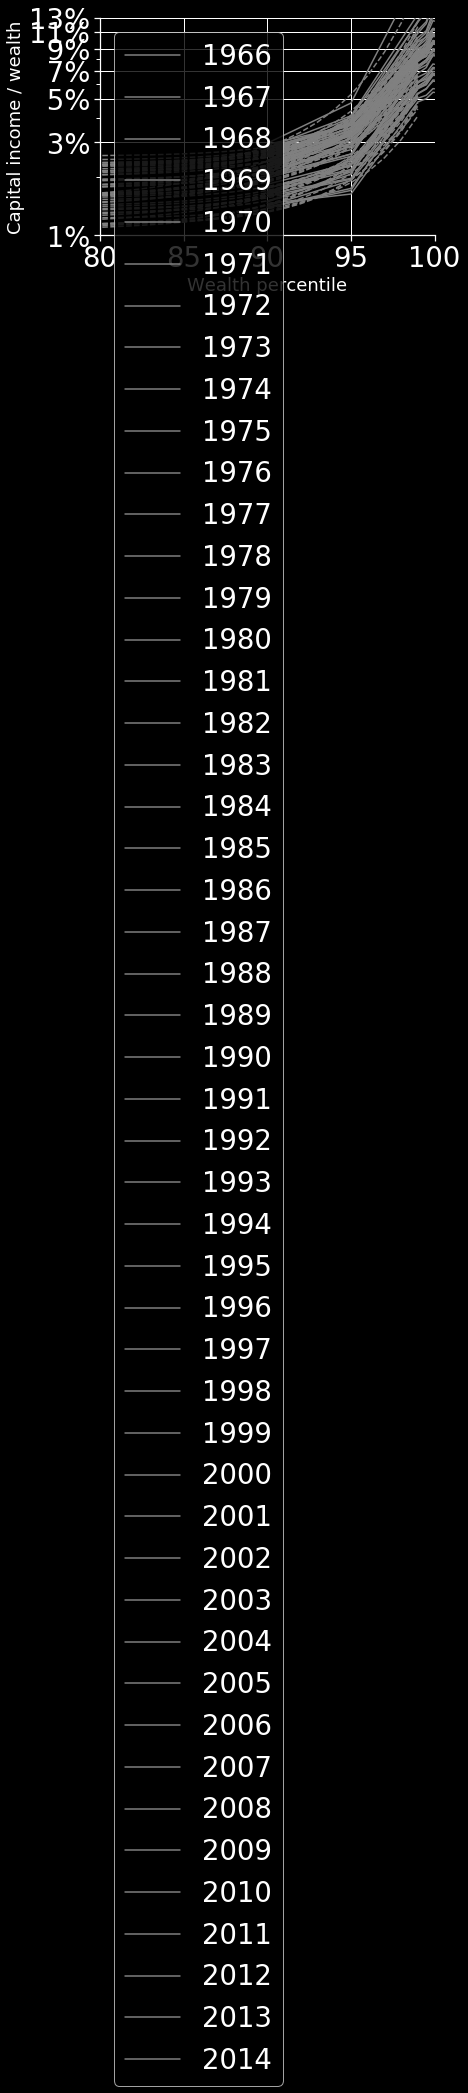

In [24]:
# sns.set(font_scale=1.5)
# plt.style.use('dark_background')


year2rate_return = dict()

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)#,axisbg="#e5f4fe")

cs = [0.2,0.3,0.5,0.7,0.9,1]
i = 0
for year,data in a.groupby("year"):
    i += 1
    if year%10 != 0:
        pass
    #data["value"] /= np.max(data["value"])
    popt, pcov = curve_fit(func, data["perc"]-95, np.log(data["value"]))
    
    y = func(np.arange(0,100)-95,*popt)
    c = 0.5#cs.pop(0)
    plt.plot(data["perc"],data["value"],"-",color=[c,c,c],label=str(year))
    plt.plot(np.arange(0,100),np.exp(y),"--",color=[c,c,c],label="")
    
    year2rate_return[year] = np.exp(y)

    
plt.yscale("log")
plt.xlim(80,100)


pickle.dump(year2rate_return,open("data_abm/year2rate_return.dump","wb+"))

plt.xlabel("Wealth percentile",fontsize=18)
plt.ylabel("Capital income / wealth",fontsize=18)
plt.yticks(np.linspace(0.01,0.13,7),["{:2.0f}%".format(_) for _ in np.linspace(1,13,7)])
plt.ylim(0.01,.13)
plt.grid("on")
plt.legend(loc=2)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.tight_layout()

#plt.savefig("figures/rate_return.pdf")
#plt.savefig("temp_figures/return wealth.png",transparent=False,facecolor="#e5f4fe")
plt.show()

In [16]:
sns.set(font_scale=2.5)
plt.style.use('dark_background')


       perc    ahweal992j
105  75.000  2.209083e+02
120  90.000  5.876015e+02
16   99.000  6.519498e+03
17   99.900  3.504856e+04
18   99.990  1.984098e+05
19   99.999  1.511612e+06
    perc  ahweal992j
80  50.0   49.583704
88.8868950431779 236.43327506351685 2623.2510705130057 14102.492636693702 79834.1713196739 608227.4735263828


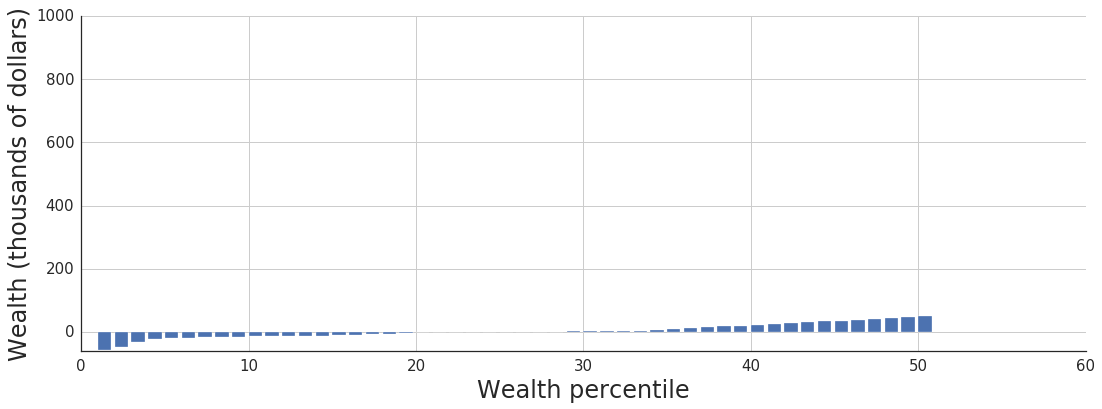

In [277]:
fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(111)
w2015 = df_ineq.loc[df_ineq["year"]==2014,["perc","ahweal992j"]]
keep_perc = ["p{}p{}".format(i,i+1) for i in range(1,100)] + ["p99.9p100","p99.99p100","p99.999p100"]
w2015 = w2015.loc[w2015["perc"].isin(keep_perc)]
p99p100 = w2015.loc[w2015["perc"]=="p99p100","ahweal992j"].values[0]
p99_9p100 = w2015.loc[w2015["perc"]=="p99.9p100","ahweal992j"].values[0]
p99_99p100 = w2015.loc[w2015["perc"]=="p99.99p100","ahweal992j"].values[0]
p99_999p100 = w2015.loc[w2015["perc"]=="p99.999p100","ahweal992j"].values[0]

w2015.loc[w2015["perc"]=="p99p100","ahweal992j"] = 1.1*p99p100 - 0.1*p99_9p100
w2015.loc[w2015["perc"]=="p99.9p100","ahweal992j"] = 1.1*p99_9p100 - 0.1*p99_99p100
w2015.loc[w2015["perc"]=="p99.99p100","ahweal992j"] = 1.1*p99_99p100 - 0.1*p99_999p100

w2015["perc"] = w2015["perc"].apply(lambda x: x.split("p")[1]).astype(float)
w2015 = w2015.sort_values(by="perc")
w2015["ahweal992j"] = w2015["ahweal992j"]/1000
print(w2015.loc[w2015["perc"].isin([75,90,99,99.9,99.99,99.999])])
w2015 = w2015.loc[w2015["perc"]<=50]
x = w2015["perc"].values
y = w2015["ahweal992j"].values
plt.bar(x,y)
plt.ylim(-1E2,1E3)


# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.xlabel("Wealth percentile",fontsize=24)
plt.ylabel("Wealth (thousands of dollars)",fontsize=24)
plt.grid("on")
plt.ylim(-60,1000)
# plt.xlim(0,70)
print(w2015.tail(1))
sns.despine()
##TOOD
# - Evolution of wealth for the top 0.1% or something like that
plt.savefig("./figures/inequality.pdf")

print(19.951*2.209083e+02/49.583704,
19.951*5.876015e+02/49.583704,
19.951*6.519498e+03/49.583704,
19.951*3.504856e+04/49.583704,
19.951*1.984098e+05/49.583704,
19.951*1.511612e+06/49.583704)

In [130]:
sns.set(font_scale=1.5)
sns.set_style("white")

In [304]:
df_ineq["perc"].unique()

array(['p0p100', 'p99p100', 'p99.9p100', 'p99.99p100', 'p90p100',
       'p90p95', 'p95p99', 'p99.5p99.9', 'p99.9p99.99', 'p99p99.5',
       'p95p100', 'p99.5p100', 'p0p50', 'p50p90', 'p90p99', 'p99.999p100',
       'p0p10', 'p10p20', 'p20p30', 'p30p40', 'p40p50', 'p50p60',
       'p60p70', 'p70p80', 'p80p90', 'p0p1', 'p1p2', 'p2p3', 'p3p4',
       'p4p5', 'p5p6', 'p6p7', 'p7p8', 'p8p9', 'p9p10', 'p10p11',
       'p11p12', 'p12p13', 'p13p14', 'p14p15', 'p15p16', 'p16p17',
       'p17p18', 'p18p19', 'p19p20', 'p20p21', 'p21p22', 'p22p23',
       'p23p24', 'p24p25', 'p25p26', 'p26p27', 'p27p28', 'p28p29',
       'p29p30', 'p30p31', 'p31p32', 'p32p33', 'p33p34', 'p34p35',
       'p35p36', 'p36p37', 'p37p38', 'p38p39', 'p39p40', 'p40p41',
       'p41p42', 'p42p43', 'p43p44', 'p44p45', 'p45p46', 'p46p47',
       'p47p48', 'p48p49', 'p49p50', 'p50p51', 'p51p52', 'p52p53',
       'p53p54', 'p54p55', 'p55p56', 'p56p57', 'p57p58', 'p58p59',
       'p59p60', 'p60p61', 'p61p62', 'p62p63', 'p63p64

In [314]:
data.loc[data["year"]==2014]/1E12

,year,bottom50,mid_class,top0.001,people_bottom,people_mid,people_top
50,2.014000e-09,-0.124042,3.341188,4.820643,0.000159,0.000064,3.189074e-09


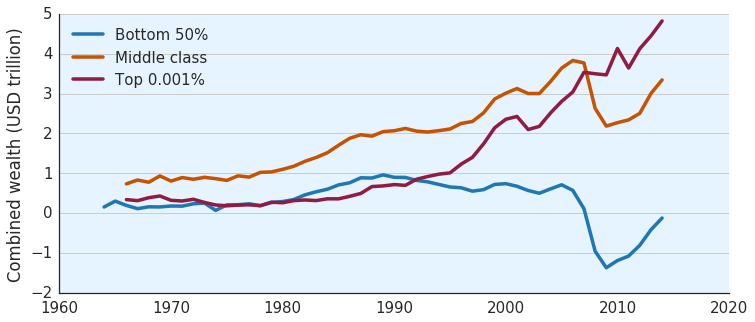

In [320]:
pop = pd.read_csv("./data_abm/us-population-1990-to-2016.csv").set_index("year")["population"]
years = range(1964,2015)
data = []
for year in years:
    x = df_ineq.loc[df_ineq["year"]==year,["perc","ahweal992j"]]
    py = pop[year]
    p50 = py/2
    ptop = py*(1-0.99999)
    pmid = py*0.2
    middle_class = ["p{}p{}".format(i,i+1) for i in range(40,61)] 
    mid =  x.loc[x["perc"].isin(middle_class),"ahweal992j"].mean()*pmid
    
    data.append((year,x.loc[x["perc"]=="p0p50","ahweal992j"].values[0]*p50,mid,
        x.loc[x["perc"]=="p99.999p100","ahweal992j"].values[0]*ptop,p50,pmid,ptop))


data = pd.DataFrame(data,columns=["year","bottom50","mid_class","top0.001","people_bottom","people_mid","people_top"])

fig = plt.figure(figsize=(12,5))
axes = fig.add_subplot(1, 1, 1, axisbg='#e5f4fe')
plt.plot(years,data["bottom50"]/1E12,color="#1f77b4",linewidth=3.5)
plt.plot(years,data["mid_class"]/1E12,color="#c85200",linewidth=3.5)
plt.plot(years,data["top0.001"]/1E12,color="#911b41",linewidth=3.5)
sns.despine()
#plt.xticks(np.arange(len(years))+0.5,years)
plt.ylabel("Combined wealth (USD trillion)")
plt.legend(["Bottom 50%","Middle class","Top 0.001%"],loc=2)
plt.gca().yaxis.grid(True)
plt.savefig("temp_figures/lines.png",transparent=False,facecolor="#e5f4fe")

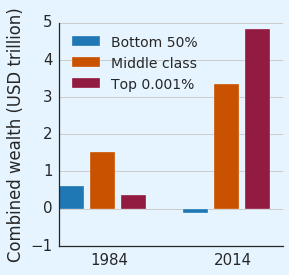

In [298]:
fig = plt.figure(figsize=(4,4),facecolor='#e5f4fe')
axes = fig.add_subplot(1, 1, 1, axisbg='#e5f4fe')

y2 = [1984,2014]
data2 = data.loc[data["year"].isin(y2)]
plt.bar(np.arange(len(y2)),data2["bottom50"]/1E12,color="#1f77b4",width=0.2)
plt.bar(np.arange(len(y2))+0.25,data2["mid_class"]/1E12,color="#c85200",width=0.2)
plt.bar(np.arange(len(y2))+0.5,data2["top0.001"]/1E12,color="#911b41",width=0.2)
sns.despine()
plt.xticks(np.arange(len(y2))+0.4,y2)
plt.ylabel("Combined wealth (USD trillion)")
plt.legend(["Bottom 50%","Middle class","Top 0.001%"],loc=2,fontsize=14)
plt.gca().yaxis.grid(True)
plt.savefig("temp_figures/bars.pdf",transparent=False,facecolor="#e5f4fe")


In [300]:
data.loc[data["year"].isin([2014])]

,year,bottom50,mid_class,top0.001,people_bottom,people_mid,people_top
50,2014,-1.240424e+11,3.341188e+12,4.820643e+12,159453700.5,63781480.2,3189.07401


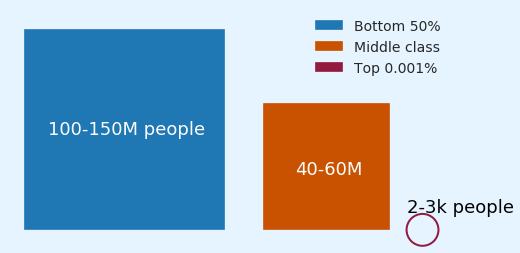

In [269]:
fig = plt.figure(figsize=(8,4),facecolor='#e5f4fe')
axes = fig.add_subplot(1, 1, 1, axisbg='#e5f4fe')

y2 = [2014]
data2 = data.loc[data["year"].isin(y2)]
plt.bar([-5000],np.sqrt(data2["people_bottom"]),color="#1f77b4",width=np.sqrt(data2["people_bottom"]))
plt.bar([10000],np.sqrt(data2["people_mid"]),color="#c85200",width=np.sqrt(data2["people_mid"]))
plt.bar([20000],np.sqrt(data2["people_top"]),color="#911b41",width=np.sqrt(data2["people_top"]))
sns.despine(bottom=True,left=True)


plt.legend(["Bottom 50%","Middle class","Top 0.001%"],
           loc=1,fontsize=14)

axes.set_yticklabels([])
axes.set_xticklabels([])
plt.axis('equal')
plt.xlim(-5100,21000)

circle1 = plt.Circle((20000, 0), 1000, facecolor="none",edgecolor="#911b41", linewidth=2,clip_on=False)

axes.add_artist(circle1)

plt.annotate("100-150M people",(-3500,6000),color="white")
plt.annotate("40-60M",(12000,3500),color="white")
plt.annotate("2-3k people",(19000,1100),color="black")

plt.savefig("temp_figures/people.pdf",transparent=False,facecolor="#e5f4fe")

In [275]:
data.loc[data["year"]==2014]

,year,bottom50,mid_class,top0.001,people_bottom,people_mid,people_top
50,2014,-1.240424e+11,3.341188e+12,4.820643e+12,159453700.5,63781480.2,3189.07401


In [85]:
df_ineq.loc[df_ineq["year"]==1913,["perc","ahweal992j"]]
keep_perc = ["p{}p{}".format(i,i+1) for i in range(1,100)] + ["p99.9p100","p99.99p100","p99.999p100"]
w2015 = w2015.loc[w2015["perc"].isin(keep_perc)]

,perc,ahweal992j
12,p0p100,2.969393e+05
13,p0p50,-7.779210e+02
14,p50p90,2.015557e+05
15,p90p99,NaN
16,p99p100,1.144977e+07
17,p99.9p100,6.075249e+07
18,p99.99p100,3.177918e+08
19,p99.999p100,1.511612e+09
20,p0p10,-3.637271e+04
21,p10p20,-1.006540e+04


In [52]:
2623.000/236.400

11.09560067681895

In [51]:
1.984098e+05*0.001

198.4098

In [ ]:
2.209083e+02

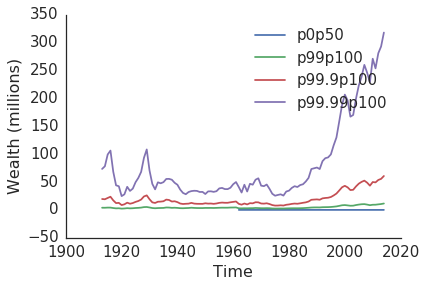

In [276]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)

for p in ["p0p50","p99p100","p99.9p100","p99.99p100"]:
    a = df_ineq.loc[df_ineq["perc"]==p,["year","ahweal992j"]].dropna().sort_values(by="year")
    #a.loc[a["ahweal992j"]<0,"ahweal992j"] = 100
    plt.plot(a["year"],a["ahweal992j"]/1E6,label=p)


# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.xlabel("Time",fontsize=16)
plt.ylabel("Wealth (millions)",fontsize=16)
plt.legend()
plt.savefig("./figures/wealth_evolution.pdf")

In [174]:
df = pd.read_csv("./wid/Data/WID_US_InequalityData.csv",sep=";",skiprows=7)

#t threshold, a average, b invert pareto coefficient, s share
#tptinc992j: pre-tax national income, every adult
#tdiinc992j: post-tax national income, every adult
#cainc

national_income = df[["year","perc","aptinc992j","adiinc992j"]]
national_income["tax_rate"] = 100*(national_income["aptinc992j"] - national_income["adiinc992j"])/national_income["aptinc992j"]
keep_perc = ["p{}p{}".format(i,i+1) for i in range(1,100)]
national_income = national_income.loc[national_income["perc"].isin(keep_perc)]

/home/javiergb/Programs/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [175]:
national_income.loc[national_income["year"]==2010]

,year,perc,aptinc992j,adiinc992j,tax_rate
1108,2010,p99p100,1.248235e+06,1.004640e+06,19.515147
1123,2010,p1p2,-1.890827e+03,6.305262e+02,133.346582
1124,2010,p2p3,-5.673984e+02,3.782405e+03,766.622526
1125,2010,p3p4,0.000000e+00,6.241382e+03,-inf
1126,2010,p4p5,8.191579e+02,8.132209e+03,-892.752307
1127,2010,p5p6,2.206466e+03,9.582645e+03,-334.298371
1128,2010,p6p7,3.404390e+03,1.090607e+04,-220.353205
1129,2010,p7p8,4.476059e+03,1.185186e+04,-164.783415
1130,2010,p8p9,5.421473e+03,1.298704e+04,-139.548104
1131,2010,p9p10,6.304134e+03,1.405833e+04,-123.001732


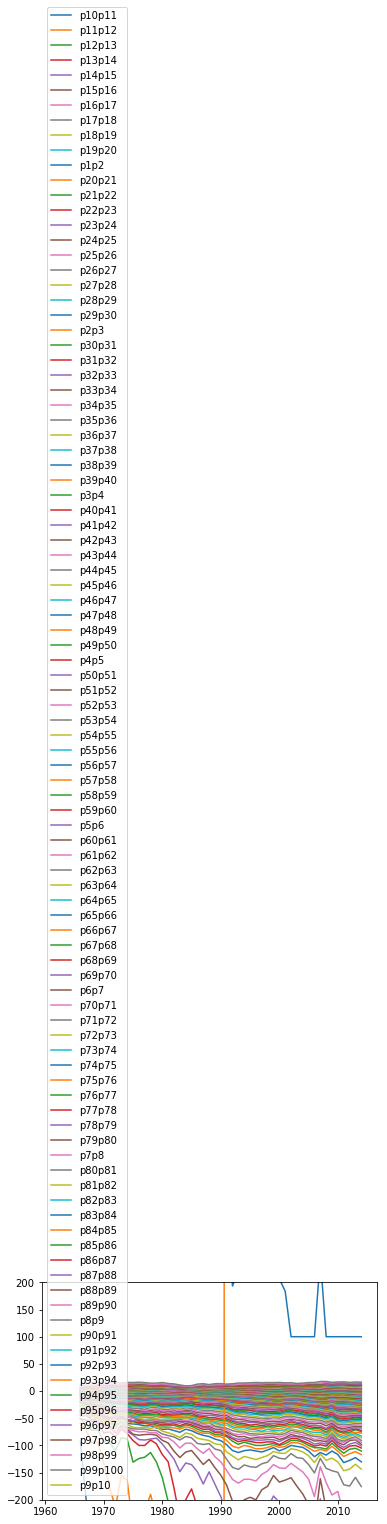

In [32]:
for p,data in national_income.groupby("perc"):
    x = data.groupby("year").mean().reset_index()
    plt.plot(x["year"],x["tax_rate"],label=p)
    #sns.pointplot(x="year",y="tptinc992j",hue="perc",data=national_income)
plt.ylim(-200,200)
plt.legend()
